In [14]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

# DataFrame selection

i.e 'Titanic'

In [15]:
df = fetch_openml('titanic', version=1, as_frame=True)['data']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


# Null info

Getting information about NULL values, and making a graph to understand about them

In [16]:
# null percentage is calculated
df_null = pd.DataFrame((df.isnull().sum()/len(df))*100)
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [17]:
import seaborn as sns # importing graph plotting library

* Plotting Graph

<Axes: title={'center': 'Null %'}, ylabel='%'>

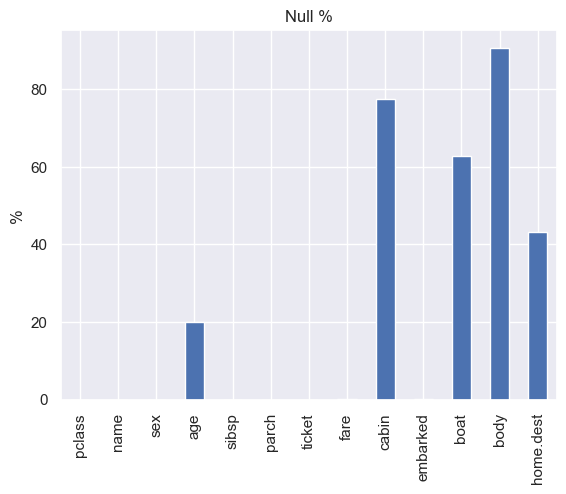

In [18]:
sns.set()
df_null.plot(kind='bar', title='Null %', ylabel='%', legend=False)

In [19]:
df.shape

(1309, 13)

# Removing unnecessary

Removing body column as it has most number of null values (above 85%), and it is not even much informative to work with

In [20]:
df.drop(columns=['body'],axis=1, inplace=True)
print(df.shape)
df.head(5)

(1309, 12)


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


# Imputing

Imputing is a method used in cleaning of a dataset by filling the Null values with specific statistically thought methods like, 'mean', 'most_frequent', 'median' etc..

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
# Creating a function which runs throughout the dataFrame and marks strategy for specific (null containing) columns
def get_para1(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
        if df[col].dtype == float or df[col].dtype == int:
            strategy = 'mean'
        else:
            strategy = 'most_frequent'
        missing_values = df[col][df[col].isnull()].values[0]
        parameters[col] = {'missing_values': missing_values, 'strategy': strategy}
    return parameters
get_para1(df)

{'age': {'missing_values': np.float64(nan), 'strategy': 'mean'},
 'fare': {'missing_values': np.float64(nan), 'strategy': 'mean'},
 'cabin': {'missing_values': nan, 'strategy': 'most_frequent'},
 'embarked': {'missing_values': nan, 'strategy': 'most_frequent'},
 'boat': {'missing_values': nan, 'strategy': 'most_frequent'},
 'home.dest': {'missing_values': nan, 'strategy': 'most_frequent'}}

* Applying imputation according to predefined missing_values with predefined strategies

In [23]:
parameters = get_para1(df)
for col,param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    impute = SimpleImputer(missing_values=missing_values,strategy=strategy)
    df[col] = impute.fit_transform(df[[col]]).ravel() # df[[col]] represents 2D and .ravel is imp coz 2D is converted into sequence

In [24]:
df.isnull().sum()

pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
home.dest    0
dtype: int64

In [25]:
df.head(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"


In [27]:
df.tail()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
1304,3,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C23 C25 C27,C,13,"New York, NY"
1305,3,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,C23 C25 C27,C,13,"New York, NY"
1306,3,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C23 C25 C27,C,13,"New York, NY"
1307,3,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C23 C25 C27,C,13,"New York, NY"
1308,3,"Zimmerman, Mr. Leo",male,29.000000,0,0,315082,7.8750,C23 C25 C27,S,13,"New York, NY"
